In [129]:
import math
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pandas

In [137]:
class LinearClassifier:
    def __init__(self, nrinputs):
        self.weights = np.zeros(nrinputs)
        self.ninputs = nrinputs
    
    # Threshold the given value using this LinearClassifier's threshold function.
    def threshold(self, z):
        pass
    
    # Update the weights of the classifier using the given inputs, output,
    # and learning rate alpha.
    def update(self, ins, outs, alpha):
        pass
    
    # Evaluate the given input vector using this classifier and return the output.
    def evaluate(self, in_vect):
        return self.threshold(np.dot(self.weights, in_vect))
    
    # Train the classifier on given examples with a constant learning rate alpha.
    # The examples should be a list of tuples of inputs (np arryas) and outputs (doubles)
    def train(self, examples, nsteps, alpha):
        training_errors = []
        training_errors.append(self.squaredErrorPerSample(examples))
        n = len(examples)
        for i in range(nsteps):
            j = rand.randint(0,n-1)
            ex = examples[j]
            self.update(ex[0], ex[1], alpha)
            training_errors.append(self.squaredErrorPerSample(examples))
        return training_errors
    
    def squaredErrorPerSample(self, examples):
        s = 0.0
        for ex in examples:
            result = self.evaluate(ex[0])
            error = ex[1] - result
            s += error * error
        return s / len(examples)

In [138]:
class PerceptronClassifier(LinearClassifier):
    def threshold(self, z):
        return 0 if z < 0 else 1
    
    # Use the perceptron learning rule:
    # w_i = w_i + alpha * (y - thresh(w.x)) * x_i
    # where w = weight vector, x = input vector
    def update(self, ins, out, alpha):
        h_w = self.threshold(np.dot(self.weights, ins))
        for i in range(self.ninputs):
            self.weights[i] = self.weights[i] + alpha * (out - h_w) * ins[i]

In [148]:
def perceptronTest(steps, alpha, ninputs, file):
    data = pandas.read_csv(file)
    examples = [(np.array(l[:ninputs]), l[ninputs]) for l in data.values]
    classifier = PerceptronClassifier(ninputs)
    error_before = classifier.squaredErrorPerSample(examples)
    print("Pre Training: " + str(error_before))
    training_errors = classifier.train(examples, steps, alpha)
    error_after = classifier.squaredErrorPerSample(examples)
    print("Post Training: " + str(error_after))
    plt.figure()
    plt.plot(training_errors)
    plt.show()


Pre Training: 0.5352112676056338
Post Training: 0.08450704225352113


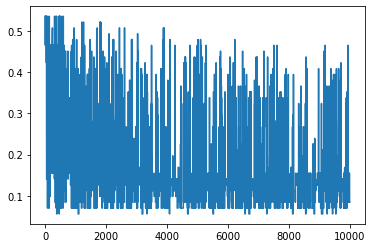

In [154]:
perceptronTest(10000, 0.1, 2, 'earthquake-noisy.data.txt')

In [150]:
class LogisticClassifier(LinearClassifier):
    # Soft threshold function
    def threshold(self, z):
        return 1 / (1 + math.exp(-z))
    
    # Use the perceptron learning rule:
    # h_w = thresh(w.x)
    # w_i = w_i + alpha * (y - h_w) * h_w * (1 - h_w) * x_i
    # where w = weight vector, x = input vector, y = output
    def update(self, ins, out, alpha):
        h_w = self.threshold(np.dot(self.weights, ins))
        for i in range(self.ninputs):
            self.weights[i] = self.weights[i] + alpha * (out - h_w) * h_w * (1 - h_w) * ins[i]

In [151]:
def logisticTest(steps, alpha, ninputs, file):
    data = pandas.read_csv(file)
    examples = [(np.array(l[:ninputs]), l[ninputs]) for l in data.values]
    classifier = LogisticClassifier(ninputs)
    error_before = classifier.squaredErrorPerSample(examples)
    print("Pre Training: " + str(error_before))
    training_errors = classifier.train(examples, steps, alpha)
    error_after = classifier.squaredErrorPerSample(examples)
    print("Post Training: " + str(error_after))
    plt.figure()
    plt.plot(training_errors)
    plt.show()



Pre Training: 0.25
Post Training: 0.06776923228337567


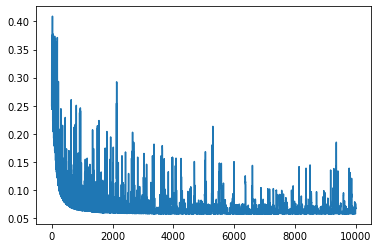

In [157]:
logisticTest(10000, 0.2, 2, 'earthquake-noisy.data.txt')

Copyright (c) 2020 TRIPODS/GradStemForAll 2020 Team